# Your input

In [76]:
image_name = "example_signature.png"

# Function definition

## Imports

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Function to plot an image

In [78]:
# Function to plot images
def plot_image(img, title):
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('green')
    if img.shape[-1] == 4:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
    plt.show()

## Function to remove the background of text

In [79]:
# Function to remove the background of the signature
def remove_signature_background(img_path = 'input_image/example_signature.png', plot=False):
    # Load an image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if plot:
        plot_image(img, 'Original Image')
    
    # convert image to binary
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    if plot:
        plot_image(img, 'Binary Image')
    
    # find the bounding box of the signature
    non_zero_pixels = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(non_zero_pixels)
    img = img[y:y+h, x:x+w]
    if plot:
        plot_image(img, 'Cropped Image')

    # invert the image
    img = cv2.bitwise_not(img)
    if plot:
        plot_image(img, 'Inverted Image')

    # convert the image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Create a mask for non-black pixels
    mask = np.any(img != [0, 0, 0], axis=-1)

    # Create an RGBA version of the image
    img_rgba = np.zeros((img.shape[0], img.shape[1], 4), dtype=np.uint8)  # Initialize with zeros
    img_rgba[..., :3] = img  # Copy the RGB channels
    img_rgba[..., 3] = np.where(mask, 0, 255)  # Set alpha to 0 for non-black pixels, 255 for black pixels
    if plot:
        plot_image(img_rgba, 'RGBA Image')

    # make a folder to save the
    if not os.path.exists('output_image'):
        os.makedirs('output_image')

    # save the image
    image_name = img_path.split('/')[-1]
    image_name = image_name.split('.')[0]
    output_path = 'output_image/' + image_name + '.png'
    cv2.imwrite(output_path, img_rgba)
    
    return None

# Visualized example of the workflow

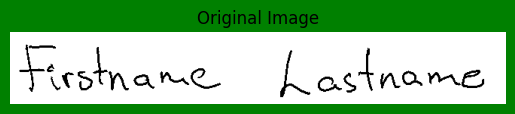

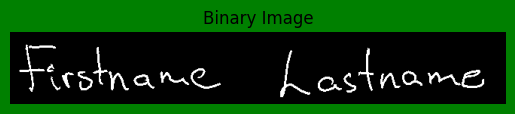

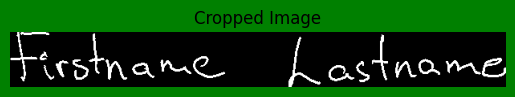

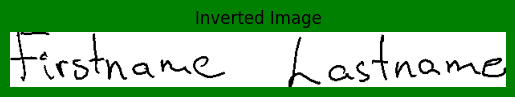

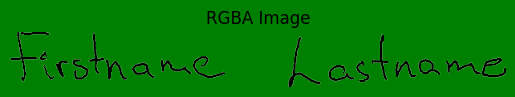

In [80]:
remove_signature_background("input_image/example_signature.png", plot=True)

# Calling the function for your image

In [81]:
# add the image path together
image_path = 'input_image/' + image_name

# call the function
remove_signature_background(image_path)